<h1>Análisando algoritmos de ordenamiento</h1>

In [96]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [97]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [98]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[0 8 9 5 4 7 3 1 2 6]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [99]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [100]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [101]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [102]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [103]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [104]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [105]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [106]:
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [107]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 119


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [108]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [109]:
print exper_analysis(10)

[2, 2, 8, 20, 32, 44, 71, 65, 95, 113]


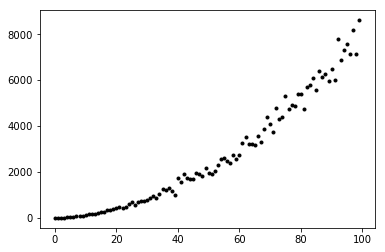

In [110]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

In [111]:
#Solución

In [112]:
import time
tic = time.clock()#get start time
toc = time.clock()#get final time

In [113]:
#1. Usamos el Algoritmo insertion_sort(A)

In [114]:
def Recalculatedtime(t1,t2):    
    return t2 - t1

In [115]:
#Gráfica Insertion Size vs Time
import random as rnd
import time

def exper_analysis_timeI(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        insertion_sort(l)
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

In [116]:
print exper_analysis_timeI(10)

[4.999999999810711e-06, 9.999999992515995e-07, 2.9999999995311555e-06, 2.000000000279556e-06, 9.000000000369823e-06, 4.999999999810711e-06, 1.100000000064938e-05, 1.699999999971169e-05, 1.1999999999900979e-05, 1.4000000000180535e-05]


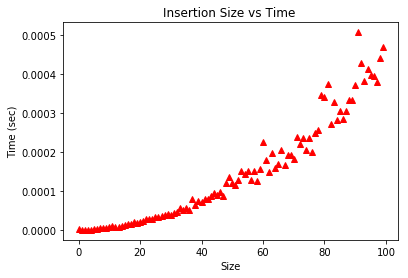

In [117]:
pl.clf()
lt = pl.title('Insertion Size vs Time ')
lx = pl.xlabel('Size')
ly = pl.ylabel('Time (sec)')
xit = np.arange(100)
yit = np.array(exper_analysis_timeI(100))
pl.plot(xit, yit, 'r^')


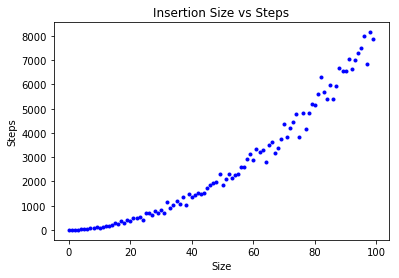

In [118]:
pl.clf()
lt = pl.title('Insertion Size vs Steps')
lx = pl.xlabel('Size')
ly = pl.ylabel('Steps')
xis = np.arange(100)
yis = np.array(exper_analysis(100))
pl.plot(xis, yis, 'b.')

In [119]:
#2. Usamos el Algoritmo mergeSort(A)

In [120]:
#Tomado de: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html
def mergeSort(alist):
    #print("Splitting ",alist)
    if len(alist)>1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k]=lefthalf[i]
                i=i+1
            else:
                alist[k]=righthalf[j]
                j=j+1
            k=k+1

        while i < len(lefthalf):
            alist[k]=lefthalf[i]
            i=i+1
            k=k+1

        while j < len(righthalf):
            alist[k]=righthalf[j]
            j=j+1
            k=k+1
    #print("Merging ",alist)

In [121]:
alist = [54,26,93,17,77,31,44,55,20]
mergeSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [122]:
#Gráfica Merge Sort Size vs Time
import random as rnd
import time

def exper_analysis_timeM(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        mergeSort(l)
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

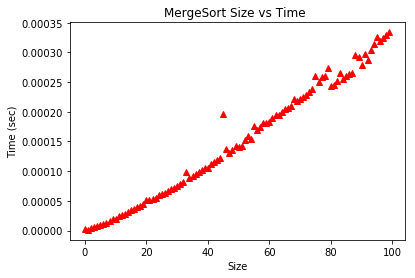

In [123]:
pl.clf()
lt = pl.title('MergeSort Size vs Time ')
lx = pl.xlabel('Size')
ly = pl.ylabel('Time (sec)')
xmt = np.arange(100)
ymt = np.array(exper_analysis_timeM(100))
pl.plot(xmt, ymt, 'r^')

In [124]:
#Modificado y Tomado de: http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html
def acct_mergeSort(alist,acct):
    #print("Splitting ",alist)
    acct.count()
    if len(alist)>1:
        acct.count()
        mid = len(alist)//2;acct.count()
        lefthalf = alist[:mid];acct.count()#¿Que significa el [:mid] y [mid:]?
        righthalf = alist[mid:];acct.count()

        mergeSort(lefthalf);acct.count()
        mergeSort(righthalf);acct.count()

        i=0;acct.count()
        j=0;acct.count()
        k=0;acct.count()
        acct.count()
        while i < len(lefthalf) and j < len(righthalf):
            acct.count()
            acct.count()
            if lefthalf[i] < righthalf[j]:
                acct.count()
                alist[k]=lefthalf[i];acct.count()
                i=i+1;acct.count()
            else:
                acct.count()
                alist[k]=righthalf[j];acct.count()
                j=j+1;acct.count()
            k=k+1;acct.count()
        acct.count()
        while i < len(lefthalf):
            acct.count()
            alist[k]=lefthalf[i];acct.count()
            i=i+1;acct.count()
            k=k+1;acct.count()
        acct.count()
        while j < len(righthalf):
            acct.count()
            alist[k]=righthalf[j];acct.count()
            j=j+1;acct.count()
            k=k+1;acct.count()
    #print("Merging ",alist)

In [125]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_mergeSort(B, acct)
acct.print_steps()

Number of steps = 71


In [126]:
import random as rnd

def exper_analysis_stepsM(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_mergeSort(l, acct)
        results.append(acct.steps)
    return results

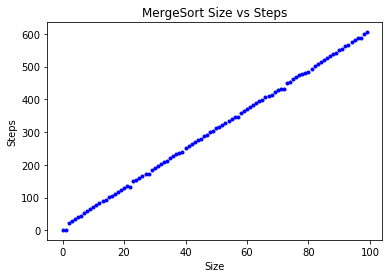

In [127]:
pl.clf()
lt = pl.title('MergeSort Size vs Steps')
lx = pl.xlabel('Size')
ly = pl.ylabel('Steps')
xms = np.arange(100)
yms = np.array(exper_analysis_stepsM(100))
pl.plot(xms, yms, 'b.')

In [128]:
#3. Usamos el Algoritmo ... #TODO quick-sort

In [129]:
#Tomado de: https://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html
def quickSort(alist):
   quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
   if first<last:

       splitpoint = partition(alist,first,last)

       quickSortHelper(alist,first,splitpoint-1)
       quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
   pivotvalue = alist[first]

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark

In [130]:
alist = [54,26,93,17,77,31,44,55,20]
quickSort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [131]:
#Gráfica Merge Sort Size vs Time
import random as rnd
import time

def exper_analysis_timeQ(n):
    results = []
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()#get start time
        quickSort(l)
        toc = time.clock()#get final time
        results.append(Recalculatedtime(tic,toc))
    return results

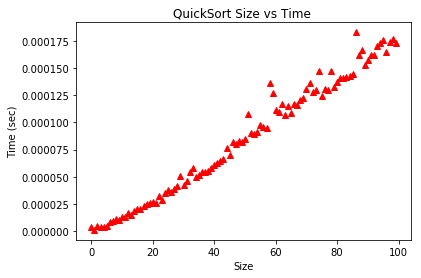

In [132]:
pl.clf()
lt = pl.title('QuickSort Size vs Time ')
lx = pl.xlabel('Size')
ly = pl.ylabel('Time (sec)')
xqt = np.arange(100)
yqt = np.array(exper_analysis_timeQ(100))
pl.plot(xqt, yqt, 'r^')

In [133]:
#Modificado y Tomado de: https://interactivepython.org/runestone/static/pythonds/SortSearch/TheQuickSort.html
def acct_quickSort(alist,acct):
   acct.count()
   acct_quickSortHelper(alist,0,len(alist)-1,acct)

def acct_quickSortHelper(alist,first,last,acct):
   acct.count()
   if first<last:
       acct.count()
       splitpoint = acct_partition(alist,first,last,acct)

       acct_quickSortHelper(alist,first,splitpoint-1,acct)
       acct_quickSortHelper(alist,splitpoint+1,last,acct)


def acct_partition(alist,first,last,acct):
   acct.count()
   pivotvalue = alist[first];acct.count()

   leftmark = first+1;acct.count()
   rightmark = last;acct.count()

   done = False;acct.count()
   acct.count()
   while not done:
       acct.count()
       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           acct.count()
           leftmark = leftmark + 1;acct.count()
       acct.count()
       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           acct.count()
           rightmark = rightmark -1;acct.count()
       acct.count()
       if rightmark < leftmark:
           acct.count()
           done = True;acct.count()
       else:
           acct.count()
           temp = alist[leftmark];acct.count()
           alist[leftmark] = alist[rightmark];acct.count()
           alist[rightmark] = temp;acct.count()

   temp = alist[first];acct.count()
   alist[first] = alist[rightmark];acct.count()
   alist[rightmark] = temp;acct.count()

   acct.count()
   return rightmark

In [134]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_quickSort(B, acct)
acct.print_steps()

Number of steps = 205


In [135]:
import random as rnd

def exper_analysis_stepsQ(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_quickSort(l, acct)
        results.append(acct.steps)
    return results

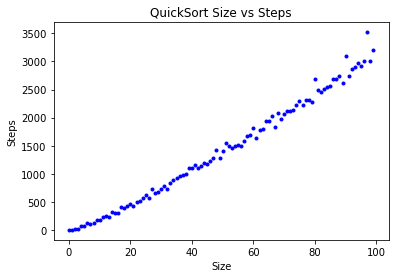

In [136]:
pl.clf()
lt = pl.title('QuickSort Size vs Steps')
lx = pl.xlabel('Size')
ly = pl.ylabel('Steps')
xqs = np.arange(100)
yqs = np.array(exper_analysis_stepsQ(100))
pl.plot(xqs, yqs, 'b.')

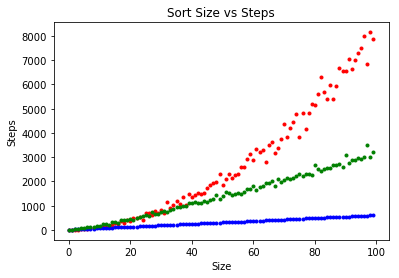

In [137]:
pl.clf()
lt = pl.title('Sort Size vs Steps')
lx = pl.xlabel('Size')
ly = pl.ylabel('Steps')
la = pl.plot(xis, yis, 'r.')
lb = pl.plot(xms, yms, 'b.')
lc = pl.plot(xqs, yqs, 'g.')

In [138]:
#Rojo: IterativeSort
#Azul: MergeSort
#Verde: QuickSort

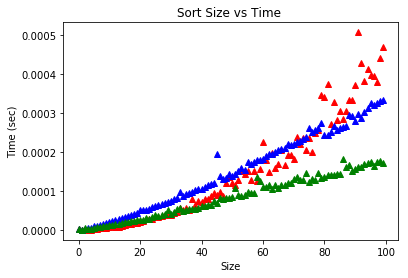

In [143]:
pl.clf()
lt = pl.title('Sort Size vs Time ')
lx = pl.xlabel('Size')
ly = pl.ylabel('Time (sec)')
la = pl.plot(xit, yit, 'r^')
lb = pl.plot(xmt, ymt, 'b^')
lc = pl.plot(xqt, yqt, 'g^')

In [140]:
#Rojo: IterativeSort
#Azul: MergeSort
#Verde: QuickSort

In [146]:
#Fin